## Company Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
company = pd.read_csv('Company_Data.csv')
company.shape

(400, 11)

In [5]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
company['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

Data Preprocessing

In [7]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
company1 = pd.get_dummies(company, columns=['Urban','US'])
company1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No',
       'US_Yes'],
      dtype='object')

In [11]:
company1.drop(columns=['Urban_No','US_No'],inplace=True)
company1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [12]:
company1 = company1.rename({'Urban_Yes':'Urban','US_Yes':'US'},axis=1)
company1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [13]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
company1['ShelveLoc'] = le.fit_transform(company1['ShelveLoc'])

In [15]:
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


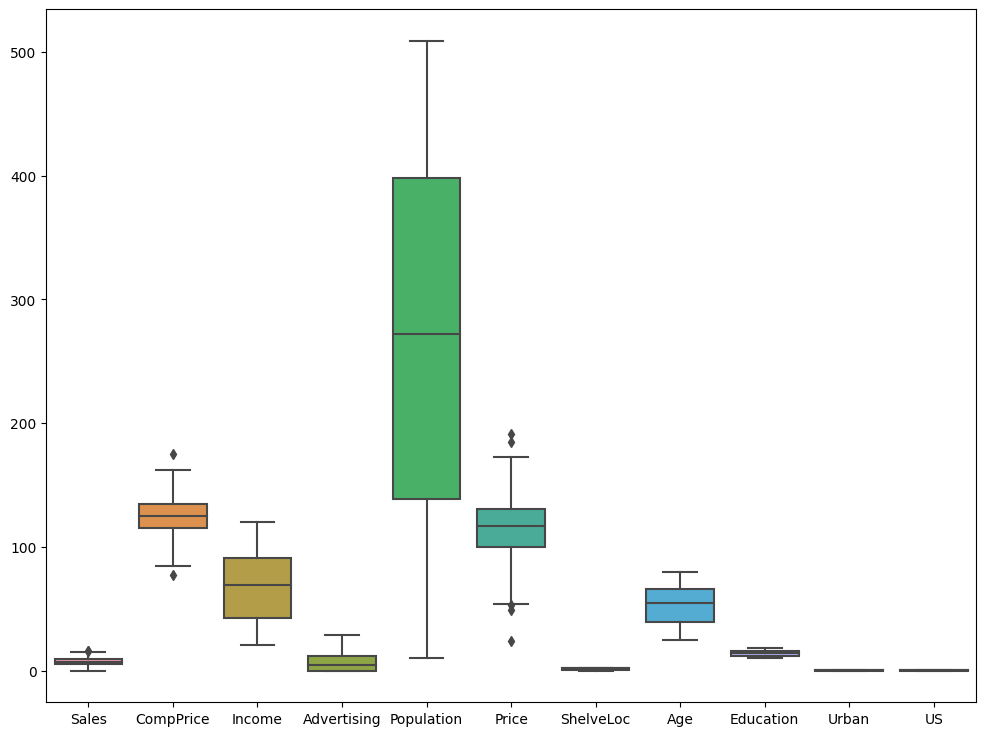

In [16]:
plt.figure(figsize=(12,9))
sns.boxplot(data=company1, orient='v')
plt.show()

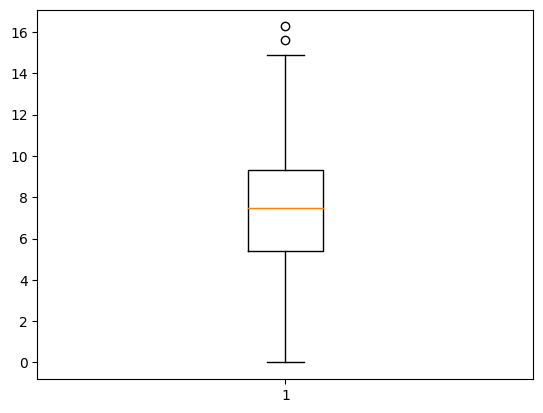

In [17]:
plt.boxplot(company1['Sales'])
plt.show()

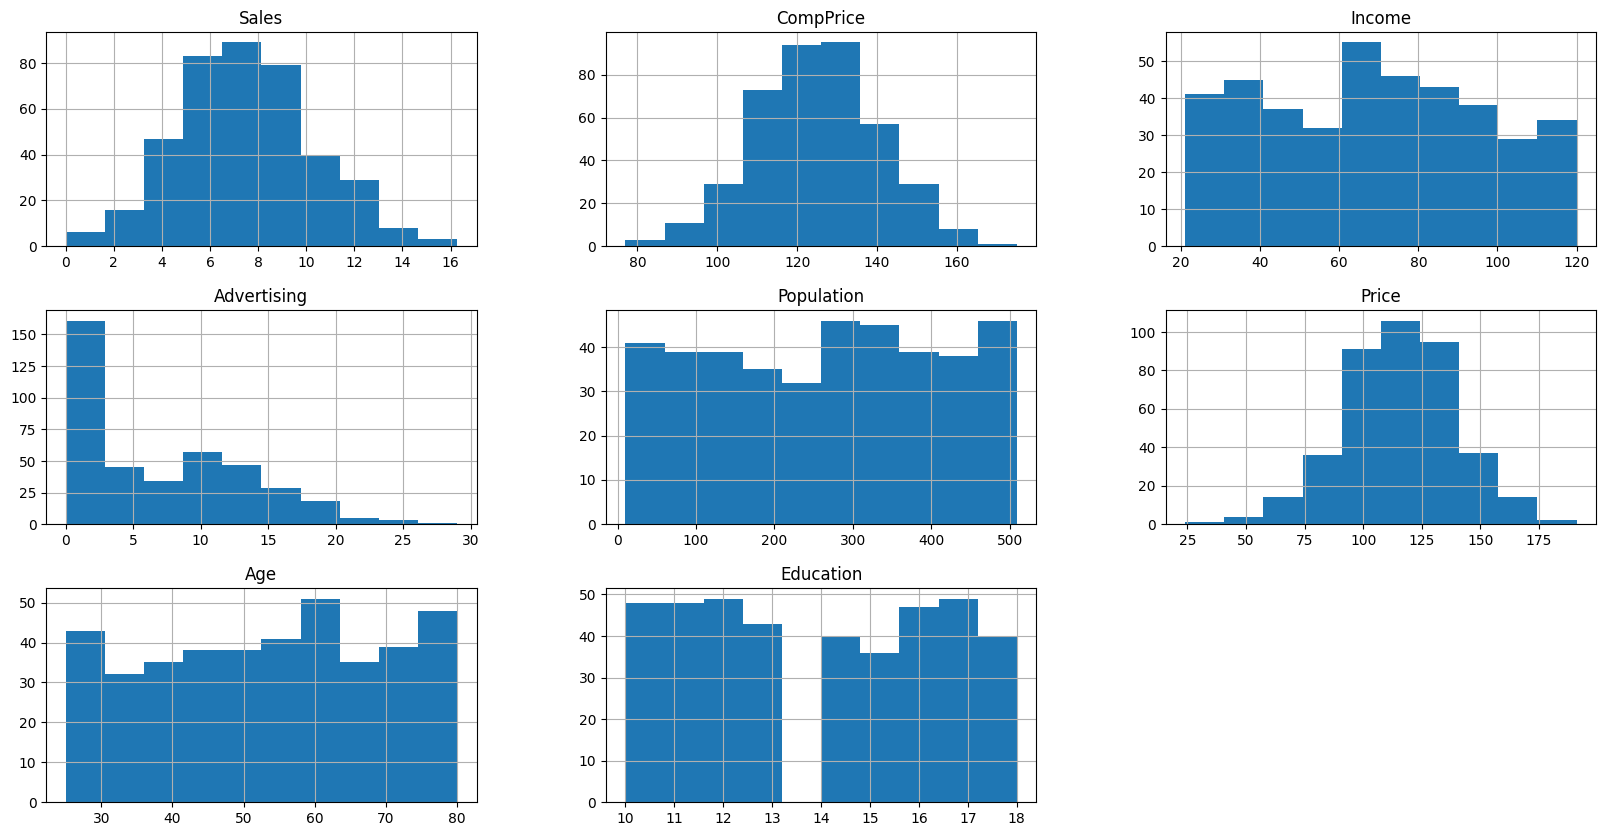

In [18]:
company.hist(figsize=(20,10))
plt.show()

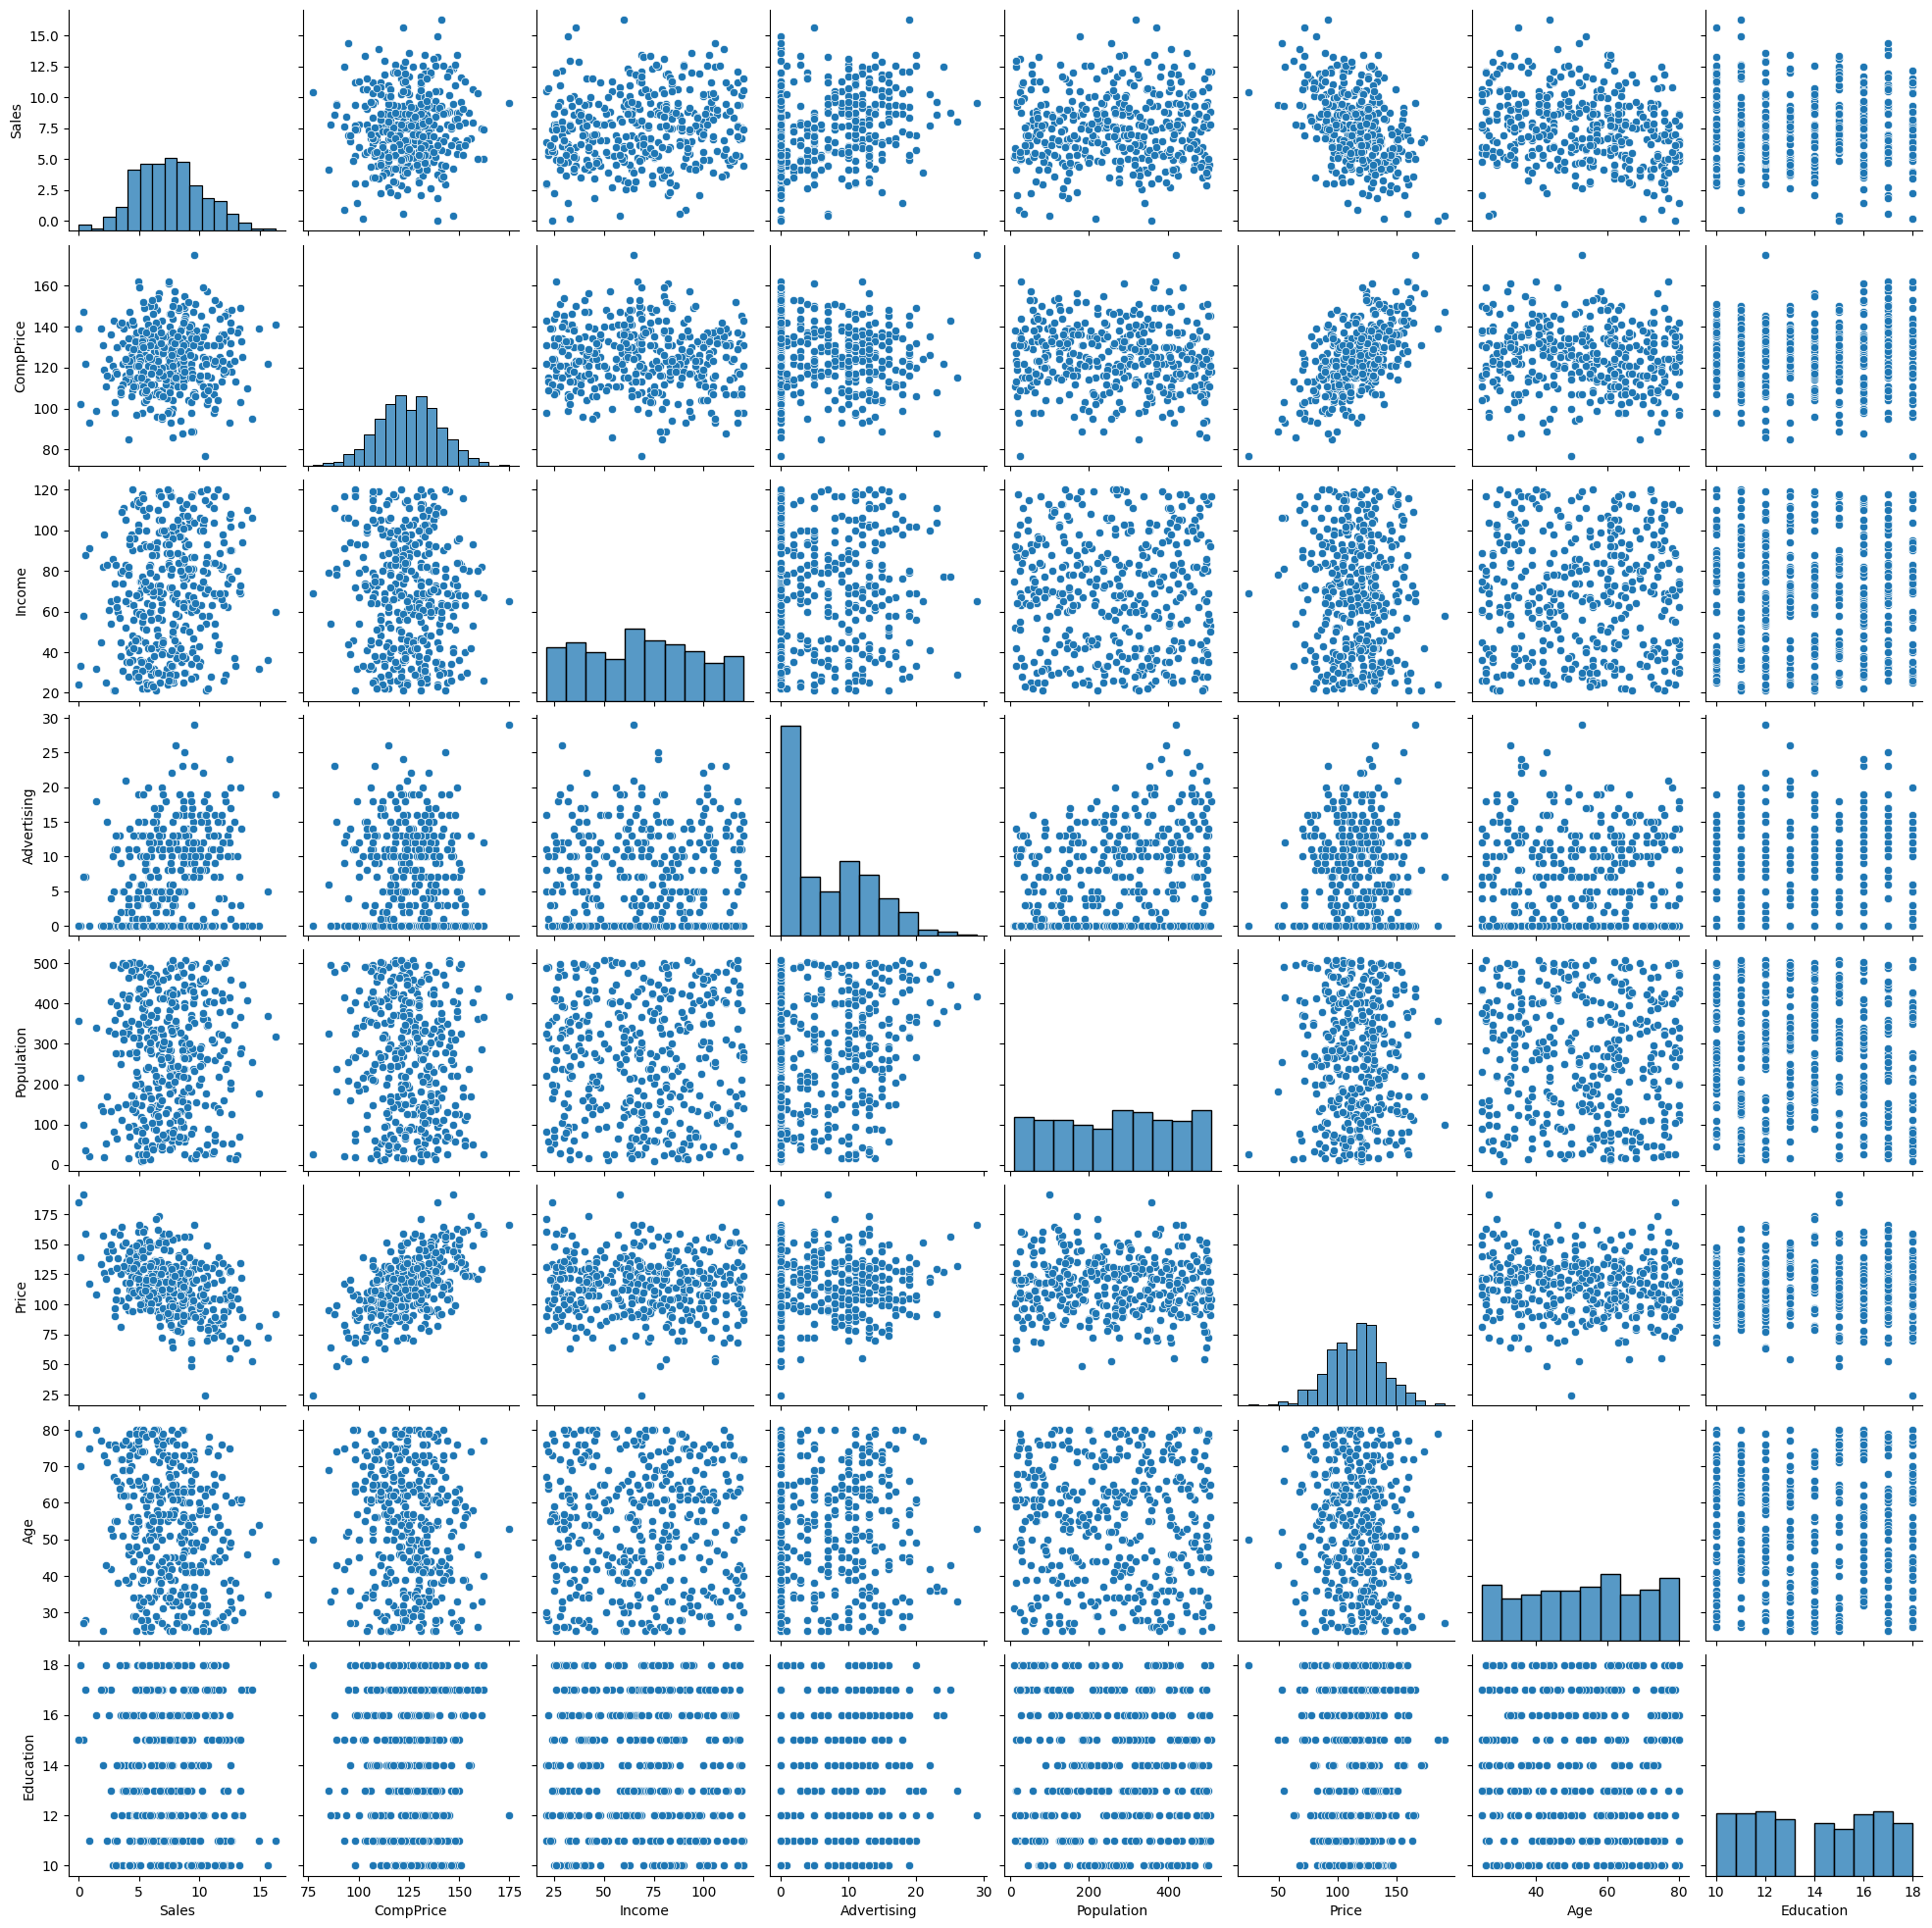

In [19]:
sns.pairplot(data=company, diag_kind='hist')
plt.show()

<Axes: xlabel='ShelveLoc', ylabel='Sales'>

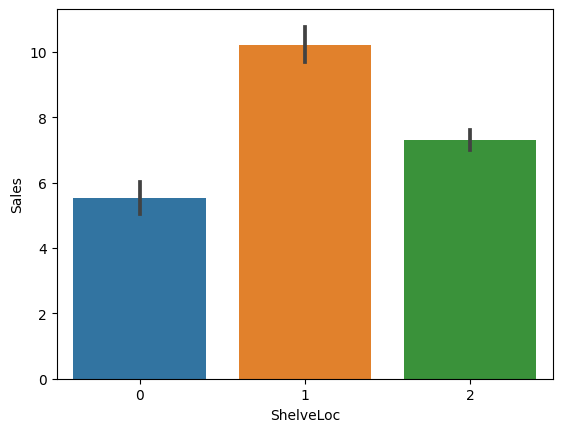

In [20]:
sns.barplot(x='ShelveLoc', y='Sales',data=company1)

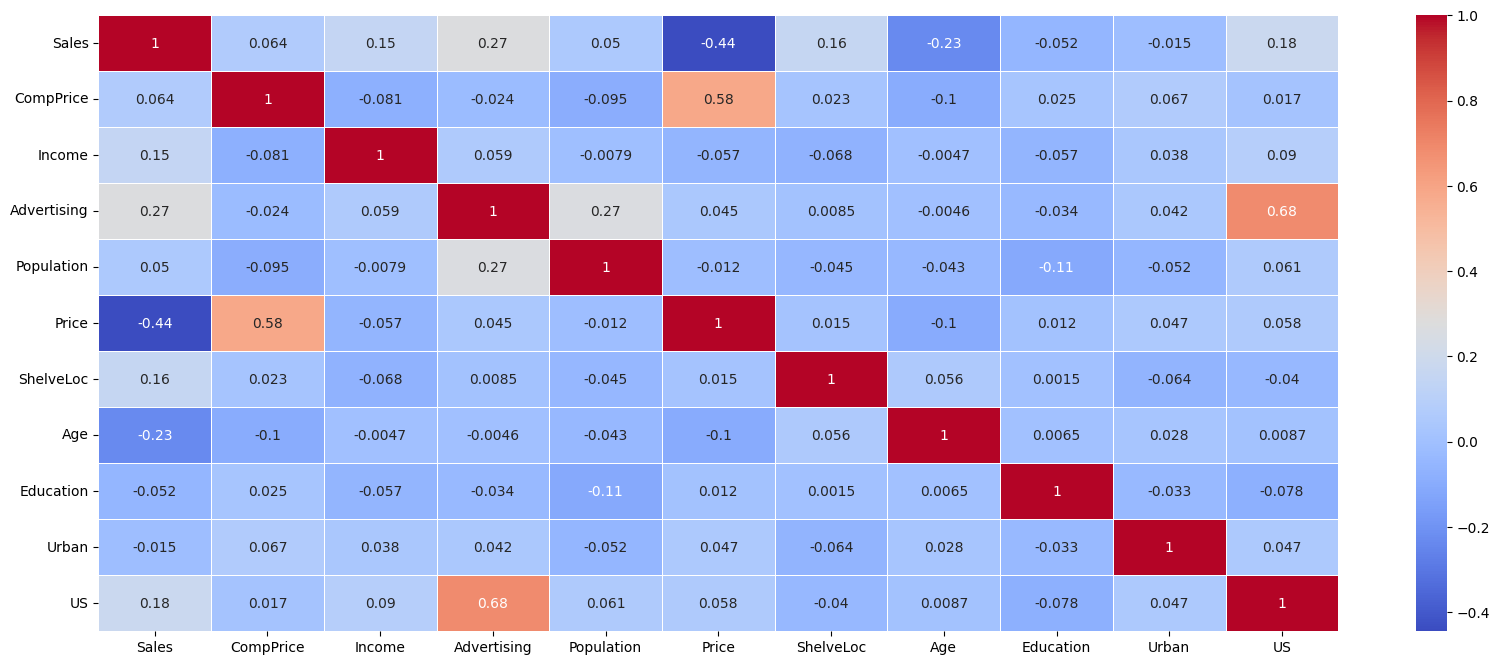

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(company1.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [22]:
X = company1.iloc[:,1:]
y = company1.iloc[:,0]
X.shape, y.shape

((400, 10), (400,))

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Fitting The Model

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

num_trees = 100
max_features = 5
kfold = KFold(n_splits=10)

model = RandomForestRegressor(n_estimators = num_trees, max_features = max_features, random_state=0)

In [25]:
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.6690025513329573


## Fraud Check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [4]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.shape

(600, 6)

In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud1 = pd.get_dummies(fraud, columns=['Undergrad','Urban'])

In [9]:
fraud1.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,Single,68833,50047,10,1,0,0,1
1,Divorced,33700,134075,18,0,1,0,1
2,Married,36925,160205,30,1,0,0,1
3,Single,50190,193264,15,0,1,0,1
4,Married,81002,27533,28,1,0,1,0


In [10]:
fraud1.drop(columns='Undergrad_NO',inplace=True)
fraud1.drop(columns='Urban_NO',inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud1['Marital.Status'] = le.fit_transform(fraud1['Marital.Status'])

In [12]:
fraud1.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,68833,50047,10,0,1
1,0,33700,134075,18,1,1
2,1,36925,160205,30,0,1
3,2,50190,193264,15,1,1
4,1,81002,27533,28,0,0


In [13]:
fraud1 = fraud1.rename({'Undergrad_YES':'Underfrad'},axis=1)
fraud1 = fraud1.rename({'Urban_YES':'Urban'},axis=1)

In [14]:
fraud1.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Underfrad,Urban
0,2,68833,50047,10,0,1
1,0,33700,134075,18,1,1
2,1,36925,160205,30,0,1
3,2,50190,193264,15,1,1
4,1,81002,27533,28,0,0


In [15]:
fraud1.corr()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Underfrad,Urban
Marital.Status,1.000000,-0.012944,-0.001564,-0.002213,0.042407,0.064562
Taxable.Income,-0.012944,1.000000,-0.064387,-0.001818,-0.049232,0.070628
City.Population,-0.001564,-0.064387,1.000000,0.013135,0.079579,-0.040098
Work.Experience,-0.002213,-0.001818,0.013135,1.000000,-0.005362,-0.094559
Underfrad,0.042407,-0.049232,0.079579,-0.005362,1.000000,-0.000267
Urban,0.064562,0.070628,-0.040098,-0.094559,-0.000267,1.000000


In [16]:
fraud1.describe()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Underfrad,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1.046667,55208.375000,108747.368333,15.558333,0.520000,0.503333
std,0.821958,26204.827597,49850.075134,8.842147,0.500017,0.500406
min,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,55074.500000,106493.500000,15.000000,1.000000,1.000000
75%,2.000000,78611.750000,150114.250000,24.000000,1.000000,1.000000
max,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


Making Target Variable

In [17]:
df = pd.DataFrame(fraud1)

In [18]:
Target = np.empty(600, dtype=object)
i = 0
for value in fraud1['Taxable.Income']:
  if value <= 30000:
    Target[i]='Risky'
  else:
    Target[i]='Good'
  i = i+1

In [19]:
Target

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [20]:
df['Target'] = Target

In [21]:
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Underfrad,Urban,Target
0,2,68833,50047,10,0,1,Good
1,0,33700,134075,18,1,1,Good
2,1,36925,160205,30,0,1,Good
3,2,50190,193264,15,1,1,Good
4,1,81002,27533,28,0,0,Good


In [22]:
df['Target'] = df['Target'].replace({'Good':0,'Risky': 1})
df['Target'].value_counts()

0    476
1    124
Name: Target, dtype: int64

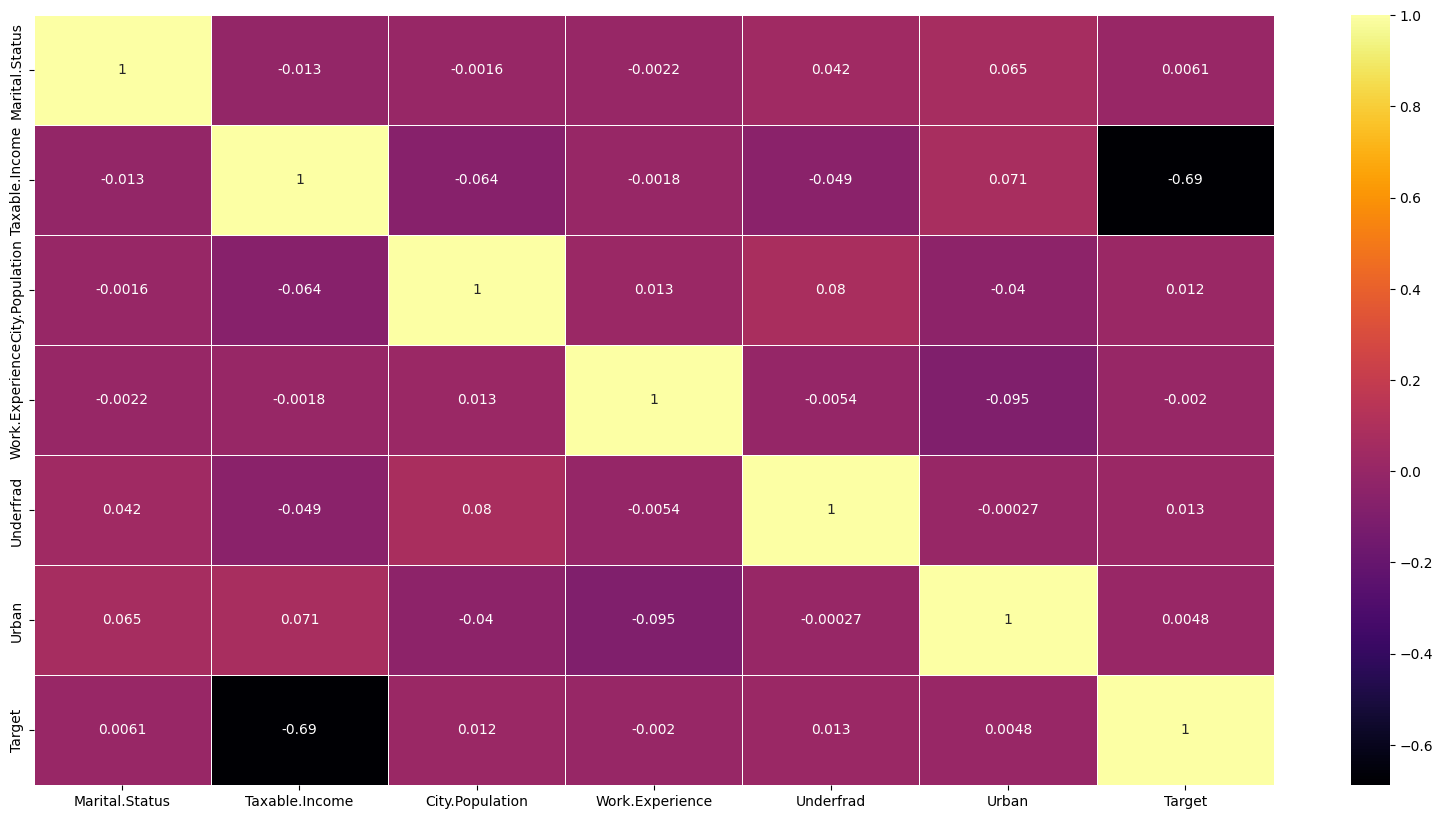

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidth=0.5)
plt.show()

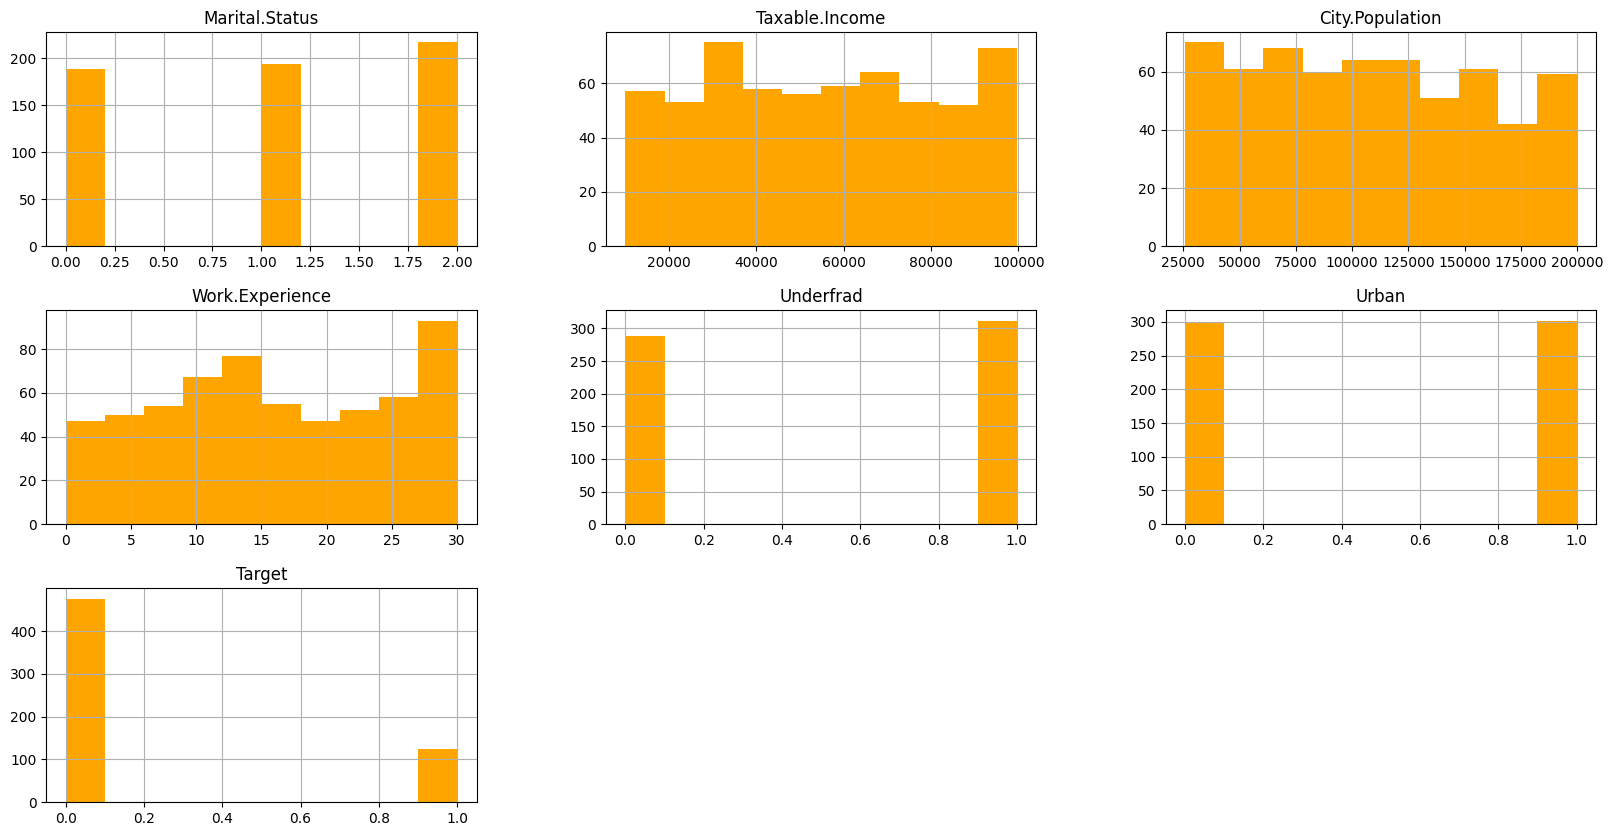

In [28]:
df.hist(figsize=(20,10),color='orange')
plt.show()

In [26]:
df[df.duplicated()]

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Underfrad,Urban,Target


In [27]:
df.isnull().sum()

Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Underfrad          0
Urban              0
Target             0
dtype: int64

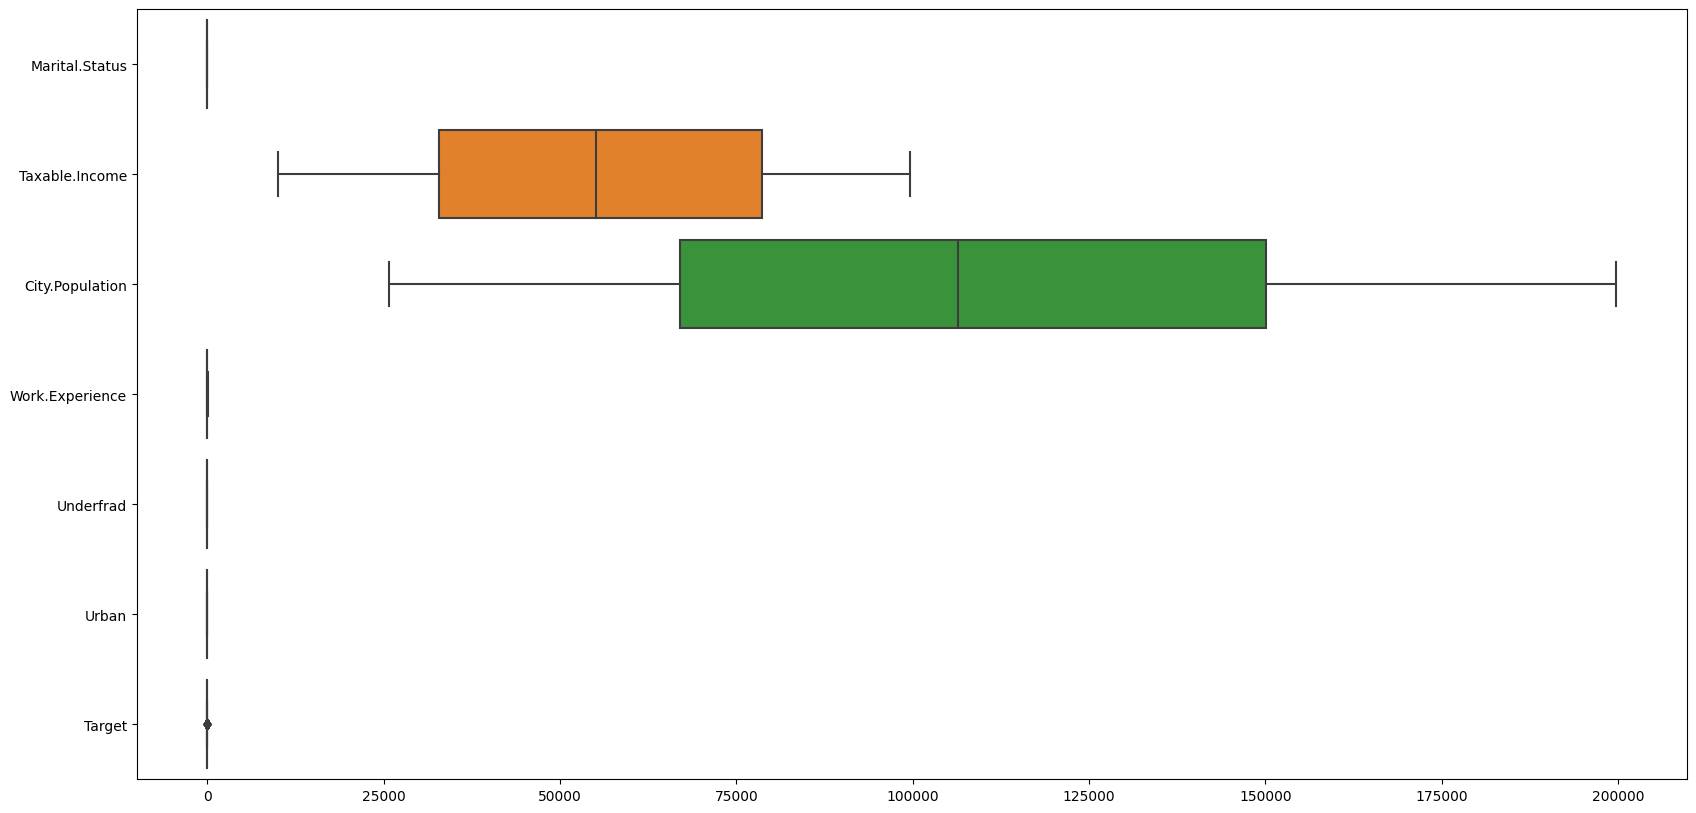

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(df, orient='h')
plt.show()

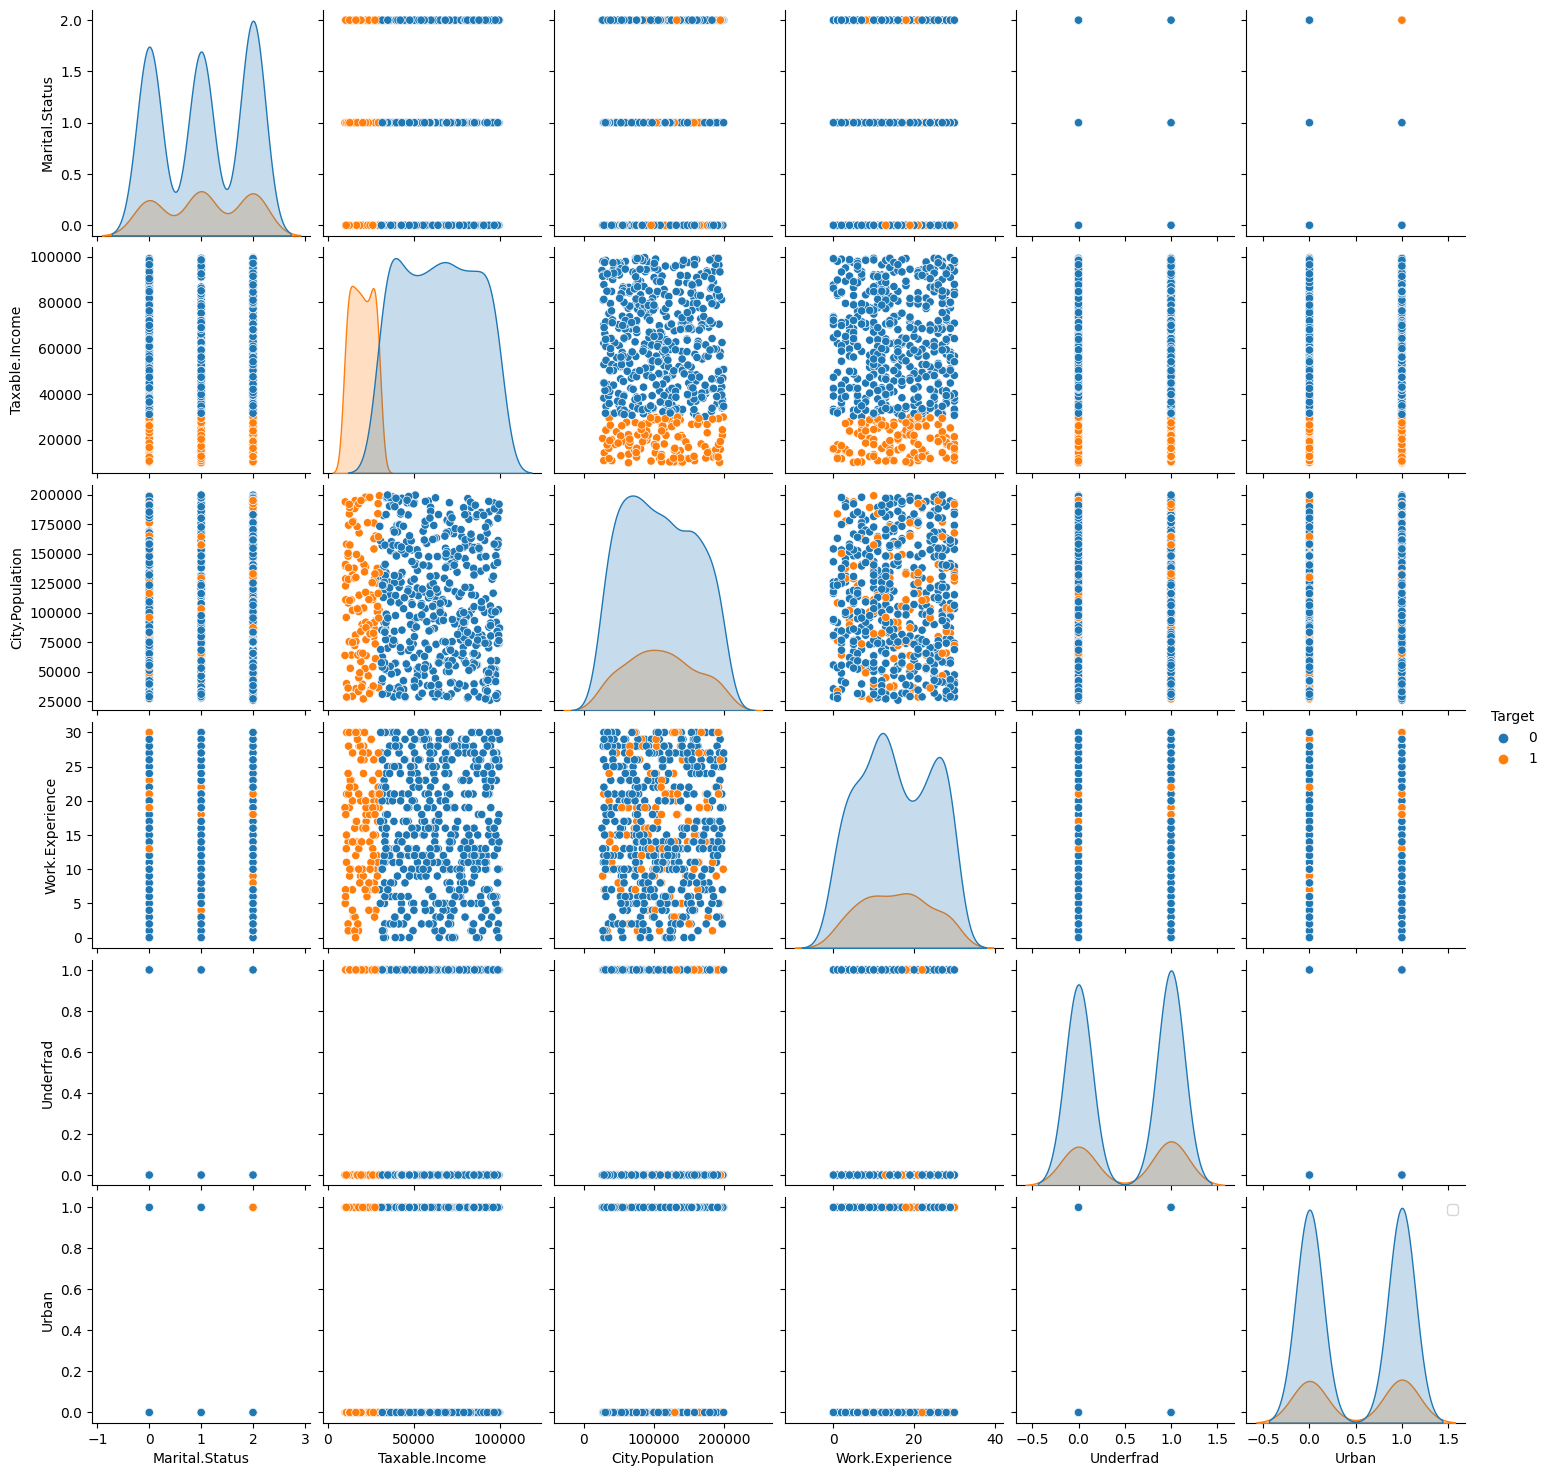

In [34]:
sns.pairplot(df, hue='Target')
plt.legend()
plt.show()

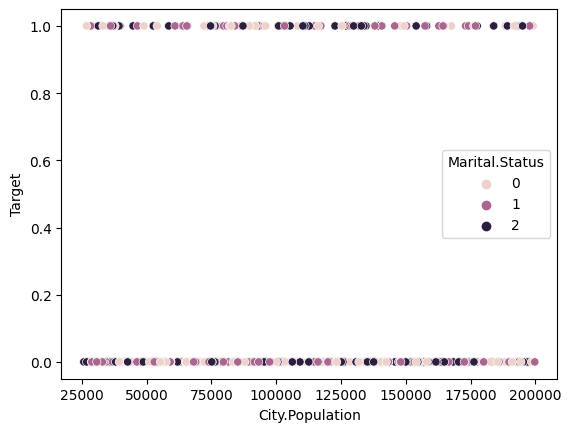

In [39]:
sns.scatterplot(x='City.Population',y='Target',hue='Marital.Status',data=df)
plt.show()

In [43]:
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Underfrad,Urban,Target
0,2,68833,50047,10,0,1,0
1,0,33700,134075,18,1,1,0
2,1,36925,160205,30,0,1,0
3,2,50190,193264,15,1,1,0
4,1,81002,27533,28,0,0,0


In [44]:
X = df.drop(columns=['Target'])
y = df['Target']
X.shape, y.shape

((600, 6), (600,))

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=0)

In [48]:
results = cross_val_score(model, X, y, cv=kfold)

In [50]:
results

array([1.        , 1.        , 1.        , 1.        , 0.98333333,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [49]:
print(results.mean())

0.9983333333333334


as we can see the model has 99% accuracy but in Decision Tree we get 100% accuracy even though we get 100% accuracy on decision tree, 99% accuracy still a good fit